In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
print "Number of passengers: {}".format(len(df))
for feature in df.columns:	
    print "{} Null: {}".format(feature, sum(df[feature].isnull()))

Number of passengers: 891
PassengerId Null: 0
Survived Null: 0
Pclass Null: 0
Name Null: 0
Sex Null: 0
Age Null: 177
SibSp Null: 0
Parch Null: 0
Ticket Null: 0
Fare Null: 0
Cabin Null: 687
Embarked Null: 2


In [ ]:
#Drop Features
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#Fill missing Ages with median
df.loc[(df.Age.isnull()), 'Age'] = df['Age'].dropna().median()
df['Age'] = df['Age'].apply(kid)

# Graphing Features Against Survival

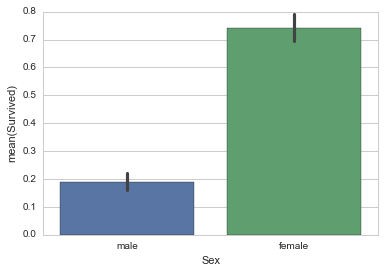

In [25]:
sns.set_style("whitegrid")
sns.barplot(x='Sex', y="Survived", data=df)  

Sex obviously has a strong signal, females are much more likely to survive.

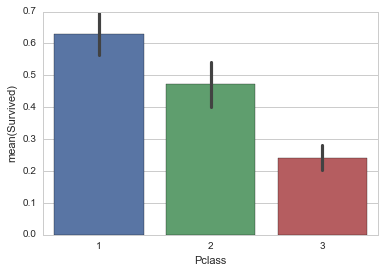

In [62]:
sns.barplot(x='Pclass', y="Survived", data=df)   

Passengers in a higher (closer to 1) Pclass were more likely to survive.

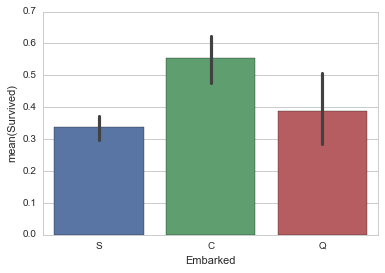

In [33]:
sns.barplot(x='Embarked', y="Survived", data=df)   

Although people embarking at port C have a higher percentage of survival, I am suspect of this feature. 
Embarking port may only be correlated with wealth, which would be better indicated by Fare or Pclass.

In [14]:
df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

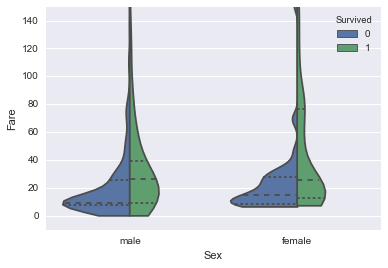

In [15]:
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(x="Sex", y="Fare", hue="Survived", data=df, split=True, inner="quart", bw=.2, cut=0)
ax.set(ylim=(-10, 150))
ax

Male and Female passengers who have a higher Fare are more likely to survive.

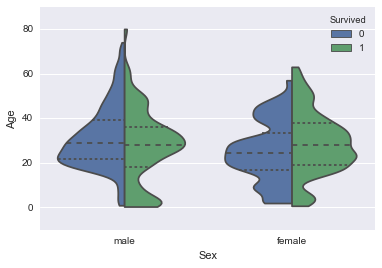

In [16]:
# Draw a nested violinplot and split the violins for easier comparison
ax1 = sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, inner="quart", bw=.2, cut=0)
ax1.set(ylim=(-10, 90))
ax1

I do not see a strong connection between age and survival, but Male and Females bellow Age 10 
may be more likely to survive.

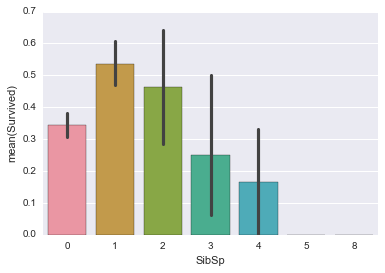

In [24]:
sns.barplot(x='SibSp', y="Survived", data=df)   

In [17]:
df.describe()

/Users/charleslynn/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
